In [1]:
import os
import json
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB  # Use MultinomialNB if the features are counts
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

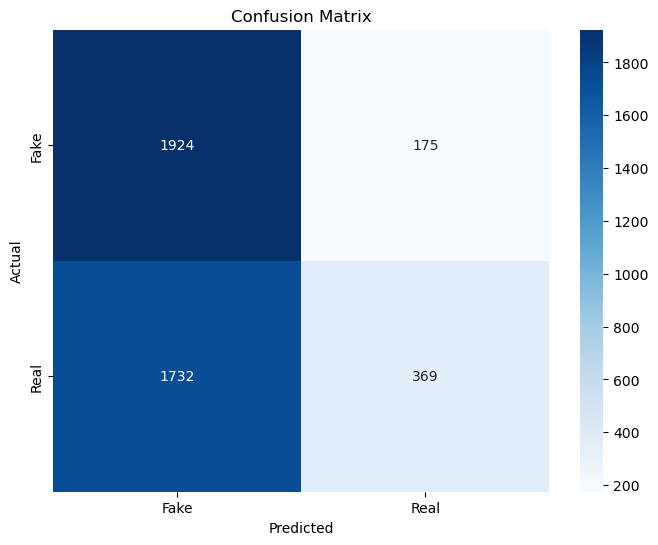


Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.92      0.67      2099
           1       0.68      0.18      0.28      2101

    accuracy                           0.55      4200
   macro avg       0.60      0.55      0.47      4200
weighted avg       0.60      0.55      0.47      4200

10-fold Cross Validation Accuracy: 0.5456 ± 0.0408


In [2]:
# Set working directory
os.chdir('C:/Users/asus/Documents/GitHub/CMSC-197-Miniproject')

# Read JSON file
df = pd.read_json('data/VADER_normalized.json', orient='records')

# Assign X and y
X = df.drop(['Label'], axis=1)
y = df['Label']

X = X.fillna(X.mean())

# Training and test set
train_size = 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=None)

# Create and test Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, predictions))

cv_scores = cross_val_score(nb, X, y, cv=10)

print(f"10-fold Cross Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")